# Palmer Penguins

![Penguins](img/penguins%20640x400.png)


This notebook contains my analysis of the famous Palmer Penguins dataset.

You can find more information about the dataset [on GitHub](https://github.com/allisonhorst/palmerpenguins).

**Disclamer:** Some of the text used in this notebook were created by ChatGPT. However, I merely used the tool to better write the texts and being me who prompt the GPT with the information I gathered from different sources. I also reviewed and rephased all the text generated to eliminate errors or false information, in case ChatGPT had added more information on the top of the ones I gave to it. In other words, I used the tool to help write, since English is not my first language and I often can be very direct and concise on what I want to say. Also, some of the code was written with the help of the Copilot AI.

## Imports

***

On this project, I will be using three python libraries:

### Pandas

The pandas is a powerful, flexible open-source data analysis and manipulation tool written in the Python programming language. In essence, pandas provide strong and very efficient data structures specifically designed for the easy and straightforward handling of structured data; this includes the DataFrame and Series objects. Key features of pandas include missing data handling, merging and joining of datasets, reshaping and pivoting of tables, and time series functionality. It also provides comprehensive input/output capability to load data from varied file formats and databases. Pandas is widely used both in academics and commercially, due to its ease of use, wide performance, and wide functionality for data manipulation, which represents a basic tool for a data scientist or Python-based analyst.

You can check more about Pandas documentation on their [website](https://pandas.pydata.org/docs/getting_started/index.html#getting-started).

In [14]:
# Data frames

import pandas as pd

### NumPy

NumPy is an open-source foundational library for Python used globally in domains of science and engineering. This makes it the defacto standard for numerical data manipulation in Python and forms the building block for many other scientific Python and PyData projects. NumPy is a cornerstone package in the field of data science and scientific computing. Basically, it is used for efficient computation, supplying multidimensional array/matrix data structures of high utility to the user. It's a Python library that provides application programming interface support to manage n-dimensional array objects and executes high-level mathematical functions on them.

You can check more about NumPy documentation on their [website](https://numpy.org/doc/stable/user/absolute_beginners.html).

In [106]:
# Numerical arrays

import numpy as np

### Pyplot

Pyplot is a module within the Matplotlib library in Python, designed to provide a state-based interface that simplifies the creation of various types of visualizations. It allows users to construct figures and axes, enhance them with labels, and adjust the plots with additional modifications. With its user-friendly functions, Pyplot supports the development of line plots, scatter plots, histograms, and more specialized visualizations, each with options to customize aspects like color, style, and axes properties. It integrates closely with NumPy data structures, enabling effective visualization of large datasets. Pyplot excels in interactive plotting and the incremental building of visualizations, making it highly effective for data analysis and scientific computing.

You can check more about Pyplot documentation on their [website](https://matplotlib.org/stable/tutorials/pyplot.html).

In [107]:
# Plotting

import matplotlib.pyplot as plt

In [108]:
import seaborn as sns

In [126]:
import statsmodels.api as sm

In [127]:
from statsmodels.formula.api import ols

# Types of variables used

## Load  and visualize the Data from the Palmer Penguins

***

Load the Palmer Penguins dataset from [Seaborn Data](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv) repository which contains a more polished version of the dataset.

In [166]:
# Load the penguins dataset

penguins_dataset = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

Visualize the Palmer Penguins dataset.

In [167]:
# Dataset preview

print(penguins_dataset)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2     

Unique data from the categorical variables in this data set

In [176]:
print('Species:', penguins_dataset['species'].unique())
print('Islands:', penguins_dataset['island'].unique())
print('Sex:', penguins_dataset['sex'].unique())

Species: ['Adelie' 'Chinstrap' 'Gentoo']
Islands: ['Torgersen' 'Biscoe' 'Dream']
Sex: ['MALE' 'FEMALE' nan]


## Describing and inspecting the data

***

### Describing the data

In [169]:
# Describe the dataset

print(penguins_dataset.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


Inspect the penguins in the dataset.

In [181]:
# Count the penguins from the same species

print("Number of penguins with the same species")
species_count = penguins_dataset['species'].value_counts()
print(species_count)


Number of penguins with the same species
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


In [178]:
# Count the penguins from the same island
print("Number of penguins with the same island")
island_count = penguins_dataset['island'].value_counts()
print(island_count)

Number of penguins with the same island
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


In [180]:
# Count the penguins from same sex
print("Number of penguins with the same sex")
sex_count = penguins_dataset['sex'].value_counts()
print(sex_count)

Number of penguins with the same sex
sex
MALE      168
FEMALE    165
Name: count, dtype: int64


Inspect the dataset types of variables

In [179]:
# Inspect types

print(penguins_dataset.dtypes)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


Penguins distribution across the islands

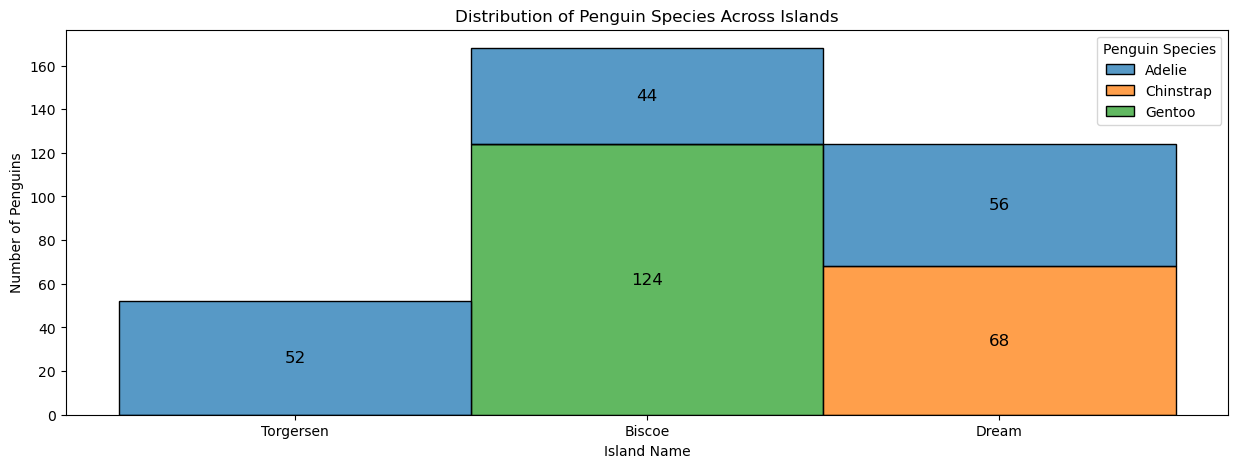

In [171]:
# Create a bar chart of all the species that live on each island
plt.figure(figsize=(15, 5))
plot = sns.histplot(data=penguins_dataset, x='island', hue='species', multiple='stack')

# Set the labels and the title
plt.xlabel('Island Name')
plt.ylabel('Number of Penguins')
plt.title('Distribution of Penguin Species Across Islands')
plot.get_legend().set_title('Penguin Species')

# Add count numbers on each bar
for p in plot.patches:
    height = p.get_height()
    # Only add the text if the height is greater than 0
    if height > 0:
        plot.text(p.get_x() + p.get_width() / 2., p.get_y() + height / 2, '%d' % int(height), 
                fontsize=12, color='black', ha='center', va='center')

# Show the plot
plt.show()


Penguins sex distribution across the islands

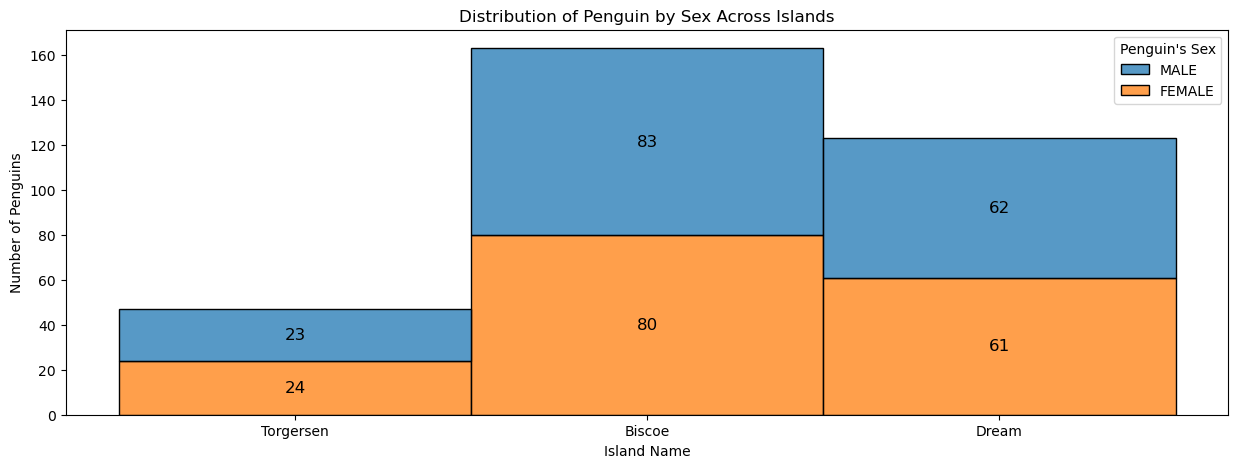

In [172]:
# Create a bar chart of all the penguins by sex that live on each island
plt.figure(figsize=(15, 5))
plot = sns.histplot(data=penguins_dataset, x='island', hue='sex', multiple='stack')

# Set the labels and the title
plt.xlabel('Island Name')
plt.ylabel('Number of Penguins')
plt.title('Distribution of Penguin by Sex Across Islands')
plot.get_legend().set_title("Penguin's Sex")

# Add count numbers on each bar
for p in plot.patches:
    height = p.get_height()
    # Only add the text if the height is greater than 0
    if height > 0:
        plot.text(p.get_x() + p.get_width() / 2., p.get_y() + height / 2, '%d' % int(height), 
                fontsize=12, color='black', ha='center', va='center')

# Show the plot
plt.show()


Histograms of the penguin's body features

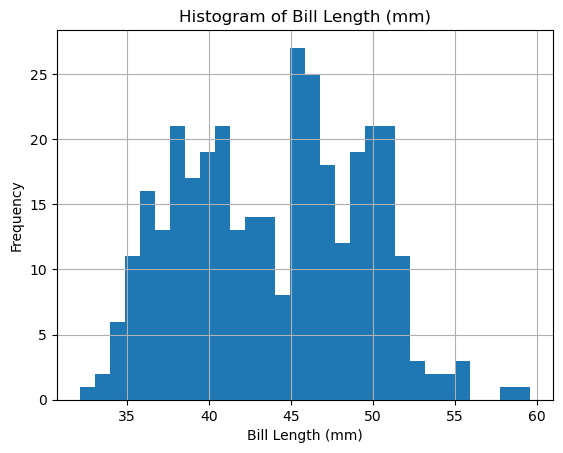

In [184]:
# Create a histogram for Bill Length (mm)
penguins_dataset['bill_length_mm'].hist(bins=30)
plt.title('Histogram of Bill Length (mm)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.show()


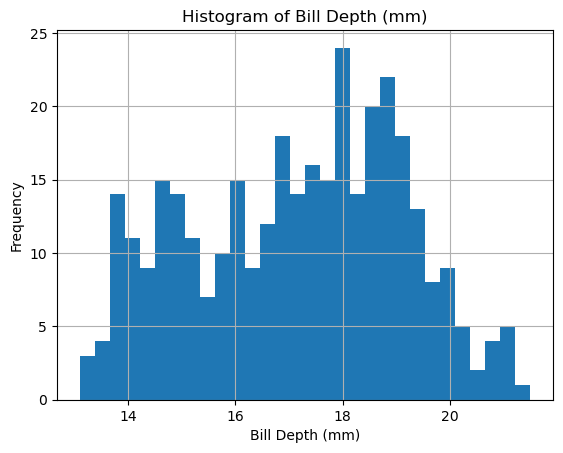

In [185]:
# Create a histogram for Bill Depth (mm)
penguins_dataset['bill_depth_mm'].hist(bins=30)
plt.title('Histogram of Bill Depth (mm)')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.show()

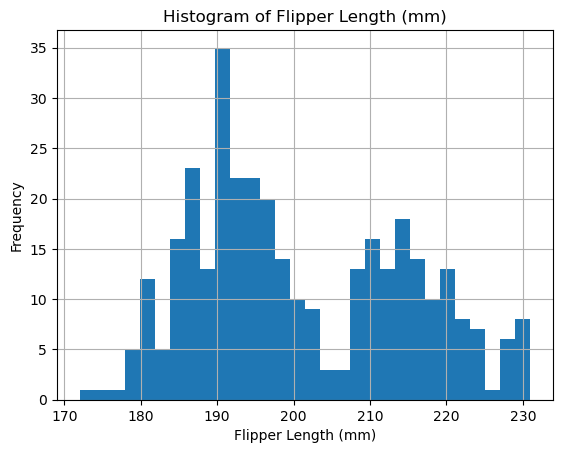

In [186]:
# Create a histogram for Flipper Length (mm)
penguins_dataset['flipper_length_mm'].hist(bins=30)
plt.title('Histogram of Flipper Length (mm)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.show()

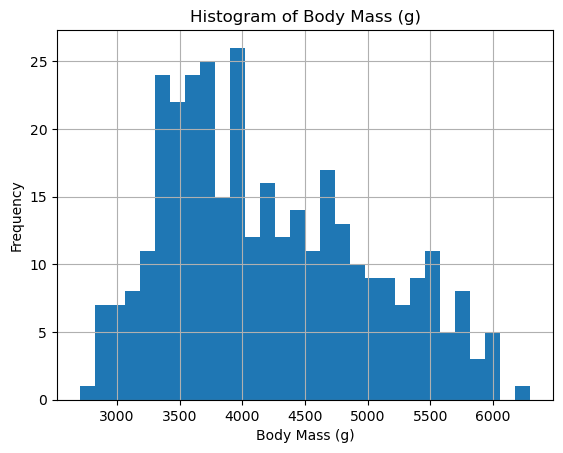

In [187]:
# Create a histogram for Body Mass (g)
penguins_dataset['body_mass_g'].hist(bins=30)
plt.title('Histogram of Body Mass (g)')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

## Setting Variables

***

In [188]:
# Setting the variables

species = penguins_dataset['species'].to_numpy()
island = penguins_dataset['island'].to_numpy()
b_length = penguins_dataset['bill_length_mm'].to_numpy()
b_depth = penguins_dataset['bill_depth_mm'].to_numpy()
f_length = penguins_dataset['flipper_length_mm'].to_numpy()
b_mass = penguins_dataset['body_mass_g'].to_numpy()
sex = penguins_dataset['sex'].to_numpy()


## Multi-way Anova of the variables to assess their relationship

***

In [189]:
# Fit the model
model = ols('bill_depth_mm ~ C(species) + C(island) + C(sex) + C(species):C(island) + C(species):C(sex) + C(island):C(sex)', data=penguins_dataset).fit()

# Perform the ANOVA
anova_table_b_depth = sm.stats.anova_lm(model, typ=2)

print(anova_table_b_depth)

# Fit the model
model = ols('bill_length_mm ~ C(species) + C(island) + C(sex) + C(species):C(island) + C(species):C(sex) + C(island):C(sex)', data=penguins_dataset).fit()

# Perform the ANOVA
anova_table_b_length = sm.stats.anova_lm(model, typ=2)

print(anova_table_b_length)

# Fit the model
model = ols('flipper_length_mm ~ C(species) + C(island) + C(sex) + C(species):C(island) + C(species):C(sex) + C(island):C(sex)', data=penguins_dataset).fit()

# Perform the ANOVA
anova_table_f_length = sm.stats.anova_lm(model, typ=2)

print(anova_table_f_length)

# Fit the model
model = ols('body_mass_g ~ C(species) + C(island) + C(sex) + C(species):C(island) + C(species):C(sex) + C(island):C(sex)', data=penguins_dataset).fit()

# Perform the ANOVA
anova_table_b_mass = sm.stats.anova_lm(model, typ=2)

print(anova_table_b_mass)

                          sum_sq     df           F        PR(>F)
C(species)            323.569964    2.0  233.859287  1.605699e-63
C(island)               0.438616    2.0    0.317008  7.285510e-01
C(sex)                188.837318    1.0  272.963287  7.132636e-45
C(species):C(island)    0.055205    4.0    0.019950  8.877661e-01
C(species):C(sex)       1.674415    2.0    1.210179  2.994922e-01
C(island):C(sex)        2.673688    2.0    1.932401  1.464705e-01
Residual              223.452958  323.0         NaN           NaN
                            sum_sq     df             F        PR(>F)
C(species)            6.742576e-10    2.0  6.246930e-11  9.999937e-01
C(island)             3.773841e+02    2.0  3.496426e+01  1.797078e-14
C(sex)                1.137734e+03    1.0  2.108199e+02  4.061409e-37
C(species):C(island)  5.620106e+03    4.0  2.603486e+02  2.287451e-43
C(species):C(sex)     1.775567e+01    2.0  1.645045e+00  1.946167e-01
C(island):C(sex)      2.333791e-01    2.0  2.162235e

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


### ANOVA Bill Depth (mm)

| Factor             | Sum of Squares | df   | F         | P-value        |
|--------------------|----------------|------|-----------|----------------|
| C(species)         | 323.569964     | 2.0  | 233.859287| 1.605699e-63   |
| C(island)          | 0.438616       | 2.0  | 0.317008  | 0.728551       |
| C(sex)             | 188.837318     | 1.0  | 272.963287| 7.132636e-45   |
| C(species):C(island)| 0.055205      | 4.0  | 0.019950  | 0.8877661      |
| C(species):C(sex)  | 1.674415       | 2.0  | 1.210179  | 0.2994922      |
| C(island):C(sex)   | 2.673688       | 2.0  | 1.932401  | 0.1464705      |
| Residual           | 223.452958     | 323.0| NaN       | NaN            |




### ANOVA Bill Length (mm)

| Factor             | Sum of Squares | df   | F         | P-value        |
|--------------------|----------------|------|-----------|----------------|
| C(species)         | 6.742576e-10   | 2.0  | 6.246930e-11| 0.9999937     |
| C(island)          | 377.3841       | 2.0  | 34.96426  | 1.797078e-14   |
| C(sex)             | 1137.734       | 1.0  | 210.8199  | 4.061409e-37   |
| C(species):C(island)| 5620.106      | 4.0  | 260.3486  | 2.287451e-43   |
| C(species):C(sex)  | 17.75567       | 2.0  | 1.645045  | 0.1946167      |
| C(island):C(sex)   | 0.2333791      | 2.0  | 0.02162235| 0.9786112      |
| Residual           | 1743.138       | 323.0| NaN       | NaN            |


### ANOVA Flipper Length (mm)

| Factor             | Sum of Squares | df   | F         | P-value        |
|--------------------|----------------|------|-----------|----------------|
| C(species)         | 3.195812e-08   | 2.0  | 5.057478e-10| 0.9999821     |
| C(island)          | 212.2157       | 2.0  | 3.358383  | 0.03601063     |
| C(sex)             | 3917.068       | 1.0  | 123.9778  | 1.371153e-24   |
| C(species):C(island)| 907.8342      | 4.0  | 7.183389  | 0.007735511    |
| C(species):C(sex)  | 380.1564       | 2.0  | 6.016100  | 0.002721006    |
| C(island):C(sex)   | 72.42291       | 2.0  | 1.146116  | 0.3191581      |
| Residual           | 10205.16       | 323.0| NaN       | NaN            |


### ANOVA Body Mass (g)

| Factor             | Sum of Squares | df   | F         | P-value        |
|--------------------|----------------|------|-----------|----------------|
| C(species)         | 5.129056e+07   | 2.0  | 264.931627| 7.928366e-69   |
| C(island)          | 286452.2       | 2.0  | 1.479614  | 0.2292648      |
| C(sex)             | 3.709943e+07   | 1.0  | 383.260123| 8.072904e-57   |
| C(species):C(island)| 2010675       | 4.0  | 5.192881  | 0.02333192     |
| C(species):C(sex)  | 760496.7       | 2.0  | 3.928201  | 0.02062629     |
| C(island):C(sex)   | 24976.28       | 2.0  | 0.129010  | 0.8790102      |
| Residual           | 31266270       | 323.0| NaN       | NaN            |


## Correlations

***

In [190]:
# Ensure all input arrays have the same shape
b_length = b_length.reshape(-1, 1)
b_depth = b_depth.reshape(-1, 1)
f_length = f_length.reshape(-1, 1)
b_mass = b_mass.reshape(-1, 1)

# Find the minimum number of rows among the arrays
min_rows = min(b_length.shape[0], b_depth.shape[0], f_length.shape[0], b_mass.shape[0])

# Slice the arrays to have the same number of rows
b_length = b_length[:min_rows]
b_depth = b_depth[:min_rows]
f_length = f_length[:min_rows]
b_mass = b_mass[:min_rows]

# Create the variables_numeric array
variables_numeric = np.nan_to_num(np.hstack([b_length, b_depth, f_length, b_mass]))

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(variables_numeric, rowvar=False)

# Print the correlation matrix
print(correlation_matrix)

[[ 1.          0.12239354  0.76365405  0.66522597]
 [ 0.12239354  1.          0.07868391 -0.15984149]
 [ 0.76365405  0.07868391  1.          0.82037084]
 [ 0.66522597 -0.15984149  0.82037084  1.        ]]


## Plotting variables

***

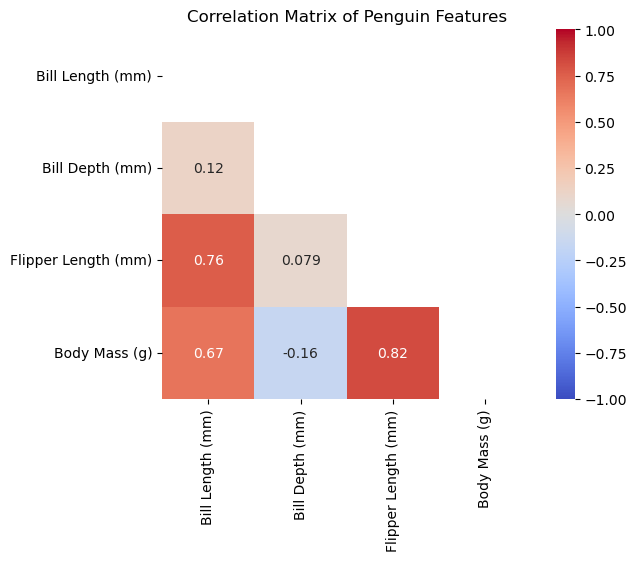

In [191]:
#plotting the correlation matrix
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True, mask=np.triu(correlation_matrix),
            xticklabels=['Bill Length (mm)', 'Bill Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'], 
            yticklabels=['Bill Length (mm)', 'Bill Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'])
plt.title('Correlation Matrix of Penguin Features')

plt.show()

(0.0, 400.0)

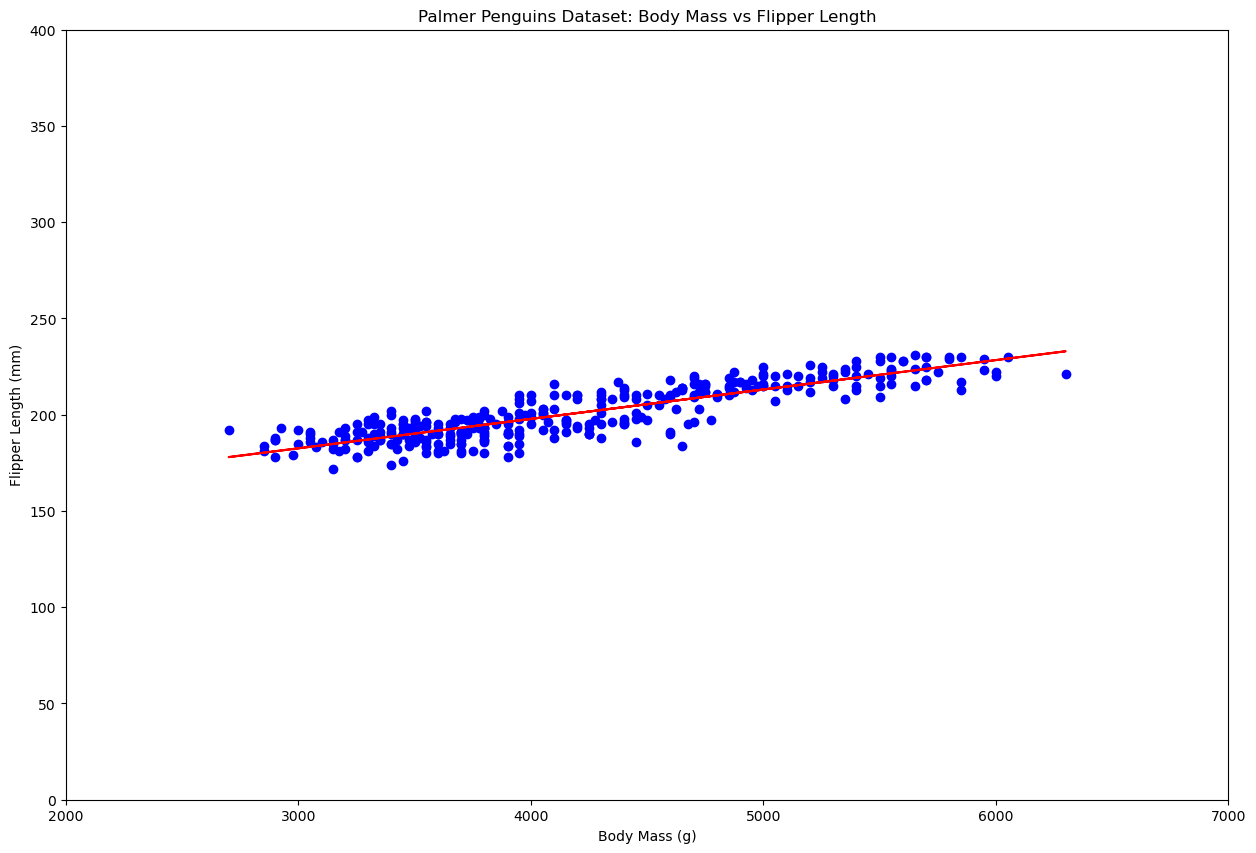

In [192]:
# Remove NaN values from b_mass and f_length
b_mass = b_mass[~np.isnan(b_mass)]
f_length = f_length[~np.isnan(f_length)]

# Fit a straight line between the two variables
m, c = np.polyfit(b_mass, f_length, 1)

# Create a new figure and set of axes
fig, ax = plt.subplots(figsize=(15, 10))
 
# Simple plot
ax.plot(b_mass, f_length, 'o', color='blue')

# Plot the best fit line in blue
ax.plot(b_mass, m * b_mass + c, 'r-')  

# Labels
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Flipper Length (mm)')
ax.set_title('Palmer Penguins Dataset: Body Mass vs Flipper Length')

# x and y axis limits
ax.set_xlim([2000, 7000])
ax.set_ylim([0, 400])


(0.0, 80.0)

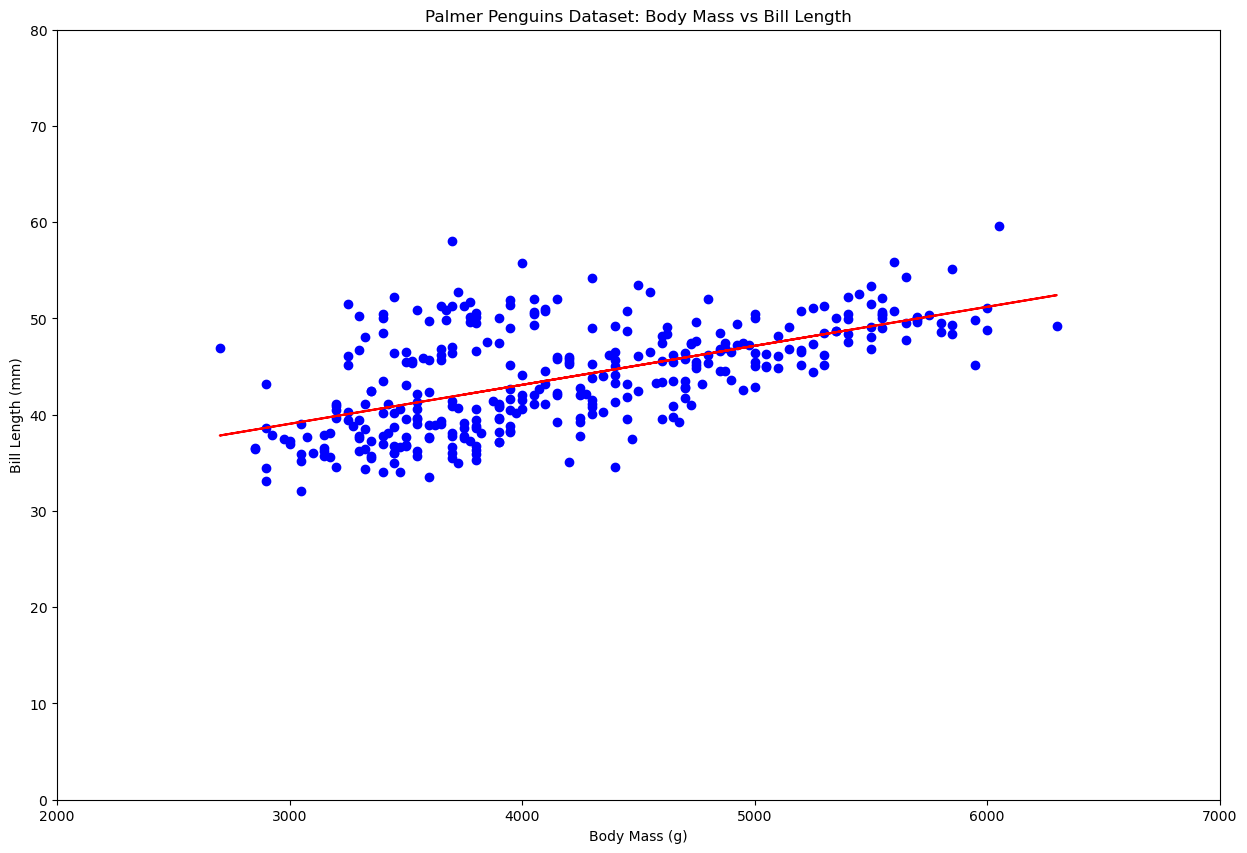

In [193]:
# Remove NaN values from b_mass and b_length
b_mass = b_mass[~np.isnan(b_mass)]
b_length = b_length[~np.isnan(b_length)]

# Fit a straight line between the two variables
m, c = np.polyfit(b_mass, b_length, 1)

# Create a new figure and set of axes
fig, ax = plt.subplots(figsize=(15, 10))
 
# Simple plot
ax.plot(b_mass, b_length, 'o', color='blue')

# Plot the best fit line in blue
ax.plot(b_mass, m * b_mass + c, 'r-')  

# Labels
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Bill Length (mm)')
ax.set_title('Palmer Penguins Dataset: Body Mass vs Bill Length')

# x and y axis limits
ax.set_xlim([2000, 7000])
ax.set_ylim([0, 80])

(30.0, 65.0)

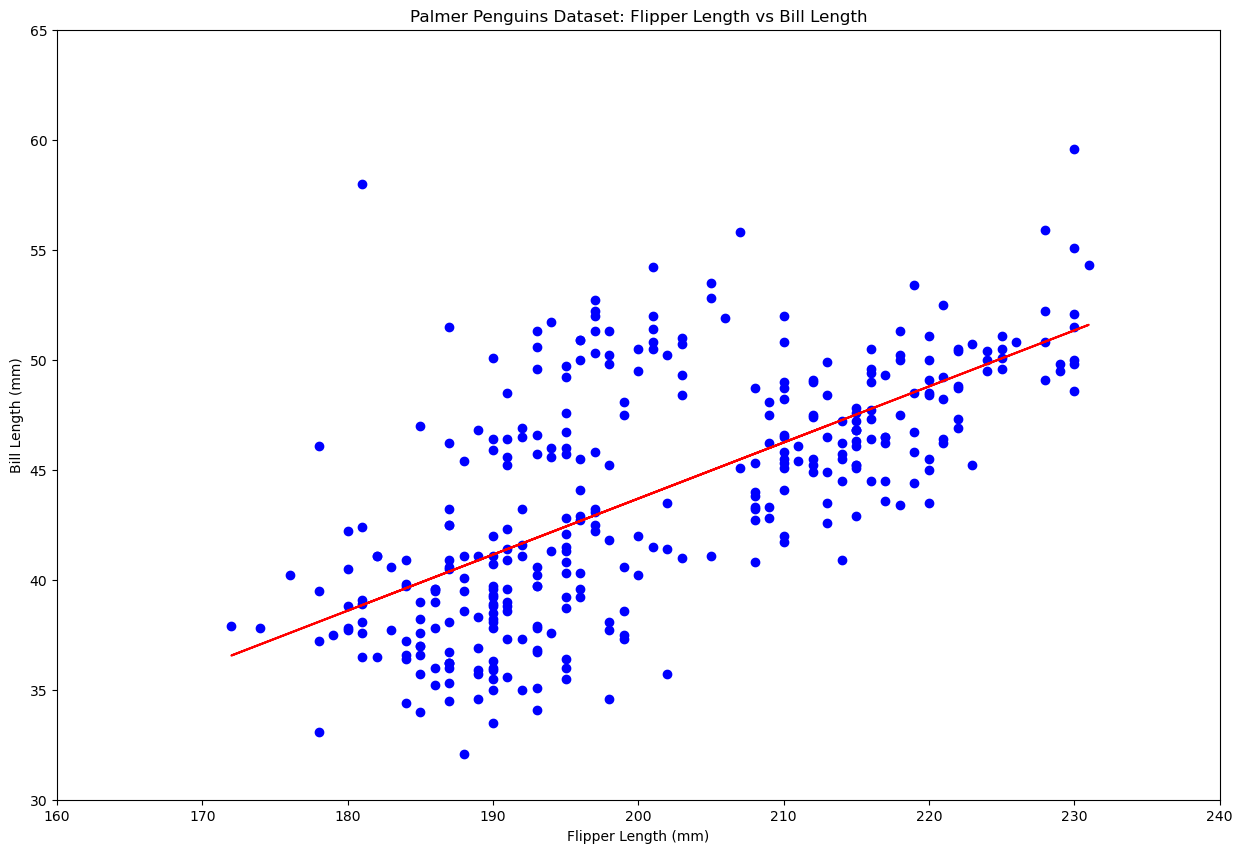

In [194]:
# Remove NaN values from f_length and b_length
f_length = f_length[~np.isnan(f_length)]
b_length = b_length[~np.isnan(b_length)]

# Fit a straight line between the two variables
m, c = np.polyfit(f_length, b_length, 1)

# Create a new figure and set of axes
fig, ax = plt.subplots(figsize=(15, 10))
 
# Simple plot
ax.plot(f_length, b_length, 'o', color='blue')

# Plot the best fit line in blue
ax.plot(f_length, m * f_length + c, 'r-')  

# Labels
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Bill Length (mm)')
ax.set_title('Palmer Penguins Dataset: Flipper Length vs Bill Length')

# x and y axis limits
ax.set_xlim([160, 240])
ax.set_ylim([30, 65])